In [149]:
#pip install sumy
import sumy 
from sumy.summarizers.text_rank import TextRankSummarizer 
from sumy.summarizers.lsa import LsaSummarizer 
from sumy.parsers.plaintext import PlaintextParser 
from sumy.nlp.tokenizers import Tokenizer
from textwrap import wrap
from youtube_transcript_api import YouTubeTranscriptApi
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.summarizers.luhn import LuhnSummarizer

In [150]:
youtube_video = "https://www.youtube.com/watch?v=ne5pf3su2nc"
video_id = youtube_video.split("=")[1]
print(video_id)

ne5pf3su2nc


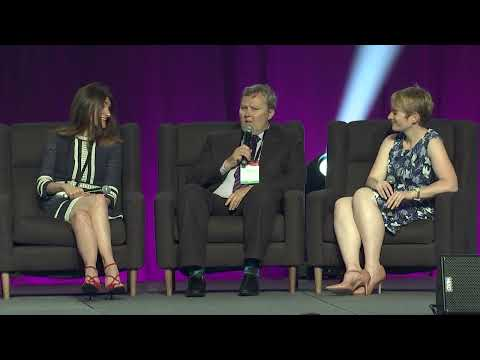

In [151]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [152]:
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [153]:
print(transcript[2:8])

[{'text': "shortages if I can it's something that", 'start': 7.74, 'duration': 3.899}, {'text': 'everywhere you go people have an', 'start': 9.599, 'duration': 4.261}, {'text': "interest in it and I'm just wondering", 'start': 11.639, 'duration': 4.2}, {'text': "you know whether it's the UK New Zealand", 'start': 13.86, 'duration': 3.9}, {'text': 'everyone is looking for staff Australia', 'start': 15.839, 'duration': 4.081}, {'text': 'Brisbane Regional areas are no different', 'start': 17.76, 'duration': 4.5}]


In [154]:
result = " "
for i in transcript:
  result += " " + i["text"]
print(len(result))

12193


In [155]:
print(result) 

  [Music] I just wanted to talk about Labor shortages if I can it's something that everywhere you go people have an interest in it and I'm just wondering you know whether it's the UK New Zealand everyone is looking for staff Australia Brisbane Regional areas are no different what do you think needs to change to see operators and businesses secure the staff that they do need and how long do you think before the situation gets back to normal Sarah would you like to take that yeah I'll uh I'll I'll give it a good crack to start with I I think it's really interesting actually I often get asked where have the people gone everyone all over the world in all sectors are short of workers where are they did they did they disappear and there has been some exit from the labor force actually not really in Australia but in other countries that's part of the story but for us here it's not really what's going on actually it's been interesting people have pivoted into new jobs so uh we've got aircrew f

In [156]:
num_iters = int(len(result)/400)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 400
  end = (i + 1) * 400
 # print("input text \n" + result[start:end])
  out = result[start:end]
 
  summarized_text.append(out)

#print(summarized_text)

In [157]:
print(len(summarized_text))

31


In [158]:
print(summarized_text)

["  [Music] I just wanted to talk about Labor shortages if I can it's something that everywhere you go people have an interest in it and I'm just wondering you know whether it's the UK New Zealand everyone is looking for staff Australia Brisbane Regional areas are no different what do you think needs to change to see operators and businesses secure the staff that they do need and how long do you thi", "nk before the situation gets back to normal Sarah would you like to take that yeah I'll uh I'll I'll give it a good crack to start with I I think it's really interesting actually I often get asked where have the people gone everyone all over the world in all sectors are short of workers where are they did they did they disappear and there has been some exit from the labor force actually not really", " in Australia but in other countries that's part of the story but for us here it's not really what's going on actually it's been interesting people have pivoted into new jobs so uh we've got

In [159]:
results = ""
for i in summarized_text:
    results += i + ". "

In [160]:
print(results)

  [Music] I just wanted to talk about Labor shortages if I can it's something that everywhere you go people have an interest in it and I'm just wondering you know whether it's the UK New Zealand everyone is looking for staff Australia Brisbane Regional areas are no different what do you think needs to change to see operators and businesses secure the staff that they do need and how long do you thi. nk before the situation gets back to normal Sarah would you like to take that yeah I'll uh I'll I'll give it a good crack to start with I I think it's really interesting actually I often get asked where have the people gone everyone all over the world in all sectors are short of workers where are they did they did they disappear and there has been some exit from the labor force actually not really.  in Australia but in other countries that's part of the story but for us here it's not really what's going on actually it's been interesting people have pivoted into new jobs so uh we've got aircr

In [161]:
'''
results = results.split(".")
print(results)
'''

'\nresults = results.split(".")\nprint(results)\n'

In [162]:
print(len(results))

12255


In [163]:
'''
new_results = ""
for i in results:
    new_results += i + ". "
'''       

'\nnew_results = ""\nfor i in results:\n    new_results += i + ". "\n'

In [164]:
#print(new_results)

In [165]:
summarizer1 = LuhnSummarizer()
parser1 = PlaintextParser.from_string(
    results,
    Tokenizer("english")
)
summary = summarizer1(parser1.document, sentences_count=5)

In [166]:
print(len(summary)) 

5


In [167]:
print(summary)

(<Sentence: couple of months and so I think we will start to see things easing particularly from the start of next year but there will be a transition I know that the near term is challenging I don't want to downplay that and there's a lot of challenge there but um economies are very good at adapting and finding new operating rhythms and changing over time so it will happen but I wish it would be right now I . don't think it's quite that quick or Tony did you want to contribute to that as well I just think that we have to learn to live with covert once we start living with covert like it's the flu then you'll see a more stabilized labor force and people will start coming back fantastic um if I can go to euros the journey to 2032 building on our strengths is the theme for today I'm actually going to ask .>, <Sentence: ture I also think it's really interesting looking at some of the other Trends and businesses positioning themselves within that nature-based tourism and being conscious ab

In [170]:
final_result = ""
for i in summary:
    a = wrap(str(i))
    for j in a:
        final_result += j + " "
print(len(final_result))
print(final_result) 
    

3616
couple of months and so I think we will start to see things easing particularly from the start of next year but there will be a transition I know that the near term is challenging I don't want to downplay that and there's a lot of challenge there but um economies are very good at adapting and finding new operating rhythms and changing over time so it will happen but I wish it would be right now I . don't think it's quite that quick or Tony did you want to contribute to that as well I just think that we have to learn to live with covert once we start living with covert like it's the flu then you'll see a more stabilized labor force and people will start coming back fantastic um if I can go to euros the journey to 2032 building on our strengths is the theme for today I'm actually going to ask . ture I also think it's really interesting looking at some of the other Trends and businesses positioning themselves within that nature-based tourism and being conscious about your climate foo

In [171]:
print("Input: ")
print(results)
print() 
print() 
print() 
print() 
print() 
print() 
print() 
print() 
print() 
print() 

print("=============================================================================================================")
print() 
print() 
print() 
print() 
print() 
print(" ")
print("Output Summary: ")
print(final_result)
print() 
print() 

Input: 
  [Music] I just wanted to talk about Labor shortages if I can it's something that everywhere you go people have an interest in it and I'm just wondering you know whether it's the UK New Zealand everyone is looking for staff Australia Brisbane Regional areas are no different what do you think needs to change to see operators and businesses secure the staff that they do need and how long do you thi. nk before the situation gets back to normal Sarah would you like to take that yeah I'll uh I'll I'll give it a good crack to start with I I think it's really interesting actually I often get asked where have the people gone everyone all over the world in all sectors are short of workers where are they did they did they disappear and there has been some exit from the labor force actually not really.  in Australia but in other countries that's part of the story but for us here it's not really what's going on actually it's been interesting people have pivoted into new jobs so uh we've g